Activate conda environment keras.yml

In [1]:
import numpy as np, os, pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
outtrain = 'training/'

In [3]:
#import trianing data
latenttrain = pd.read_csv(outtrain+'latent_coords.csv')
#Reset the Kenyan intermediates to gambiae
latenttrain.loc[latenttrain.species=='Intermediate_gambiae_coluzzii', 'species'] = 'Anopheles_gambiae'
#Remove pest, as it's unclear what it's species label should be
latenttrain = latenttrain.drop([637])

### Load test datasets

In [28]:
#load gabon data
latentgabon = pd.read_csv('../../tracking/Gabon/gambiae_complex/assignments.csv')
latentgabon.shape

(901, 15)

In [6]:
latentvalidation = pd.read_csv('../../tracking/GCvalv1/gambiae_complex/assignments.csv')
latentvalidation.shape

(142, 11)

In [7]:
latentag1k = pd.read_csv("../../tracking/Ag1000G-diverged/gambiae_complex/assignments.csv")
latentag1k.shape

(191, 10)

In [8]:
latentburkina = pd.read_csv("../../tracking/Burkina-Faso/gambiae_complex/assignments.csv")
latentburkina.shape

(770, 14)

In [9]:
def plot_species_validation(latenttrain, latentval, ax, alpha=.6):
    #fig, ax = plt.subplots(1,1, figsize=(8,8))
    
    for lab, rc in zip(['Anopheles_gambiae', 'Anopheles_coluzzii', 'Anopheles_arabiensis',
       'Anopheles_melas',
       'Anopheles_merus', 'Anopheles_tengrela', 'Anopheles_bwambae',
       'Anopheles_quadriannulatus', 'Anopheles_fontenillei', 'Anopheles_bwambae-fontenillei'], ['C0', 'C1', 'C2', 'C5', 'C6', 'C7', 'C3', 'C8', 'C9', 'C4']):
        sub = latenttrain[latenttrain.species == lab]
        ax.scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), alpha=alpha, zorder=1)

        
    for lab, rc, n in zip(['Anopheles_gambiae', 'Anopheles_coluzzii', 
                            'Anopheles_arabiensis', 'Anopheles_merus', 'Anopheles_tengrela'], 
                       ['C0', 'C1', 'C2', 'C6', 'C7'],
                      [': 79', ': 15', ': 30', ': 4', ': 6']):
        sub = latentval[latentval.assigned_species==lab]
        ax.scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), marker='^', edgecolor='k', label=lab+n, zorder=2)
        
    for labm, labv, rc1, rc2, n in zip(['Uncertain_coluzzii_tengrela_gambiae', 
                                 'Uncertain_gambiae_coluzzii', 'Uncertain_tengrela_coluzzii_gambiae'],
                                 ['Uncertain_coluzzii_\ntengrela_gambiae', 
                                 'Uncertain_gambiae_\ncoluzzii', 'Uncertain_tengrela_\ncoluzzii_gambiae'],
                                ['C1', 'C0', 'C7'], 
                                ['indigo', 'C1', 'fuchsia'],
                                [': 2', ': 1', ': 1']):
        sub = latentval[latentval.assigned_species==labm]
        ax.scatter(sub['mean1'], sub['mean3'], marker='s', edgecolor=rc1,  facecolor=rc2, linewidths=1.5, zorder=2, label=labv+n)
    sub = latentval[~latentval.assigned_species.isin(['Anopheles_gambiae', 'Anopheles_coluzzii', 
                            'Anopheles_arabiensis', 'Anopheles_merus', 'Anopheles_tengrela',
                            'Uncertain_coluzzii_tengrela_gambiae', 
                                 'Uncertain_gambiae_coluzzii', 'Uncertain_tengrela_coluzzii_gambiae'])]
    ax.scatter(sub['mean1'], sub['mean3'], c='k', marker='^', edgecolor='k', zorder=3, label='other: 4')
    
    ax.scatter(latentval.loc[[72,75],'mean1'], latentval.loc[[72,75], 'mean3'], c='red', marker='x', zorder=3, label='misclassified: 2')


    ax.set_xlabel('LS1')
    ax.set_ylabel('LS3')
    ax.set_title('GCval v1 species')
    leg1 = ax.legend(loc='lower right', prop={'size': 9})
    
    #plt.savefig(saveloc+'species_assigned.png')



In [10]:
def plot_species_val_burkina(latenttrain, latentval, ax, alpha=.6):
    
    for lab, rc in zip(['Anopheles_gambiae', 'Anopheles_coluzzii', 'Anopheles_arabiensis',
       'Anopheles_melas',
       'Anopheles_merus', 'Anopheles_tengrela', 'Anopheles_bwambae',
       'Anopheles_quadriannulatus', 'Anopheles_fontenillei', 'Anopheles_bwambae-fontenillei'], ['C0', 'C1', 'C2', 'C5', 'C6', 'C7', 'C3', 'C8', 'C9', 'C4']):
        sub = latenttrain[latenttrain.species == lab]
        ax.scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), alpha=alpha, zorder=1)

        
    for lab, rc, n in zip(['Anopheles_gambiae', 'Anopheles_coluzzii', 
                            'Anopheles_arabiensis'], 
                       ['C0', 'C1', 'C2'],
                      [': 356', ': 298', ': 51']):
        sub = latentval[latentval.assigned_species==lab]
        ax.scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), marker='^', edgecolor='k', label=lab+n, zorder=2)
        
    for labm, labv, rc1, rc2, n in zip(['Uncertain_arabiensis_gambiae',
                                 'Uncertain_arabiensis_gambiae_bwambae-fontenillei',
                                 'Uncertain_coluzzii_gambiae', 'Uncertain_gambiae_arabiensis',
                                 'Uncertain_gambiae_coluzzii'],
                                 ['Uncertain_arabiensis_\ngambiae',
                                 'Uncertain_arabiensis_\ngambiae_nbwambae-\nfontenillei',
                                 'Uncertain_coluzzii_\ngambiae', 'Uncertain_gambiae_\narabiensis',
                                 'Uncertain_gambiae_\ncoluzzii'],
                                ['C2', 'C2', 'C1', 'C0', 'C0'], 
                                ['C0', 'indigo', 'C0', 'C2', 'C1'],
                                [': 1', ': 1', ': 39', ': 1', ': 23']):
        sub = latentval[latentval.assigned_species==labm]
        ax.scatter(sub['mean1'], sub['mean3'], marker='s', edgecolor=rc1,  facecolor=rc2, linewidths=1.5, zorder=2, label=labv+n)


    ax.set_xlabel('LS1')
    ax.set_ylabel('LS3')
    ax.set_title('Burkina Faso gambiae complex species')
    leg1 = ax.legend(loc='lower right', prop={'size': 9})
    



In [20]:
def plot_species_ag1k(latenttrain, latentval, ax, alpha=.6):
    #fig, ax = plt.subplots(1,1, figsize=(8,8))
    
    for lab, rc in zip(['Anopheles_gambiae', 'Anopheles_coluzzii', 'Anopheles_arabiensis',
       'Anopheles_melas',
       'Anopheles_merus', 'Anopheles_tengrela', 'Anopheles_bwambae',
       'Anopheles_quadriannulatus', 'Anopheles_fontenillei', 'Anopheles_bwambae-fontenillei'], ['C0', 'C1', 'C2', 'C5', 'C6', 'C7', 'C3', 'C8', 'C9', 'C4']):
        sub = latenttrain[latenttrain.species == lab]
        ax.scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), alpha=alpha, zorder=1)

        
    for lab, rc, n in zip(['Anopheles_melas', 
                           'Anopheles_merus'], 
                       ['C5', 'C6'],
                      [': 11', ': 5']):
        sub = latentval[latentval.assigned_species==lab]
        ax.scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), marker='^', edgecolor='k', label=lab+n, zorder=2)
        
    for labm, labv, rc1, rc2, n in zip(['Uncertain_melas_quadriannulatus'],
                                 ['Uncertain_melas_\nquadriannulatus'],
                                ['C5'], 
                                ['C8'],
                                [': 1']):
        sub = latentval[latentval.assigned_species==labm]
        ax.scatter(sub['mean1'], sub['mean3'], marker='s', edgecolor=rc1,  facecolor=rc2, linewidths=1.5, zorder=2, label=labv+n)


    ax.set_xlabel('LS1')
    ax.set_ylabel('LS3')
    ax.set_title('Ag1000G diverged samples')
    leg1 = ax.legend(loc='lower right', prop={'size': 9})
    
    #plt.savefig(saveloc+'species_assigned.png')



In [47]:
def plot_species_val_gabon(latenttrain, latenttest, ax, alpha=.6):
    #fig, ax = plt.subplots(1,1, figsize=(8,8))
    font = latenttest.loc[latenttest['sample_id'].isin(['DN806193J_C3', 'DN806193J_G6', 'DN806193J_E8', 'DN806193J_B9',
       'DN806193J_C9', 'DN806193J_A10', 'DN806193J_C10', 'DN806193J_H10',
       'DN806193J_D12', 'DN806193J_G12', 'DN806203R_G12'])]
    latentval = latenttest.loc[~latenttest['sample_id'].isin(font['sample_id'])]
                        
    
    for lab, rc in zip(['Anopheles_gambiae', 'Anopheles_coluzzii', 'Anopheles_arabiensis',
       'Anopheles_melas',
       'Anopheles_merus', 'Anopheles_tengrela', 'Anopheles_bwambae',
       'Anopheles_quadriannulatus', 'Anopheles_fontenillei', 'Anopheles_bwambae-fontenillei'], ['C0', 'C1', 'C2', 'C5', 'C6', 'C7', 'C3', 'C8', 'C9', 'C4']):
        sub = latenttrain[latenttrain.species == lab]
        ax.scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), alpha=alpha, zorder=1)
    
    ax.scatter(font['mean1'], font['mean3'], c='C9', alpha=alpha, zorder=2, edgecolor='k', label='PCR confirmed \nfontenillei: 11')

        
    for labm, labv, rc, n in zip(['Anopheles_gambiae', 'Anopheles_coluzzii', 
                            'Anopheles_bwambae-fontenillei'], ['Anopheles_gambiae', 'Anopheles_coluzzii', 
                            'Anopheles_bwambae-\nfontenillei'],
                       ['C0', 'C1', 'C4'],
                      [': 130', ': 632', ': 1']):
        sub = latentval[latentval.assigned_species==labm]
        ax.scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), marker='^', edgecolor='k', label=labv+n, zorder=3)
        
    for labm, labv, rc1, rc2, n in zip([
                                 'Uncertain_coluzzii_gambiae', 'Uncertain_coluzzii_tengrela',
                                 'Uncertain_coluzzii_tengrela_gambiae', 'Uncertain_gambiae_coluzzii', 
                                 'Uncertain_tengrela_coluzzii', 'Uncertain_tengrela_coluzzii_gambiae'],
                                 [ 
                                 'Uncertain_coluzzii_\ngambiae', 'Uncertain_coluzzii_\ntengrela',
                                 'Uncertain_coluzzii_\ntengrela_gambiae', 'Uncertain_gambiae_\ncoluzzii', 
                                 'Uncertain_tengrela_\ncoluzzii', 'Uncertain_tengrela_\ncoluzzii_gambiae'],
                                ['C1', 'C1', 'C1', 'C0', 'C7', 'C7'], 
                                ['C0', 'C7', 'navy', 'C1', 'C1', 'fuchsia'],
                                [': 16', ': 38', ': 55', ': 6', ': 1', ': 7']):
        sub = latentval[latentval.assigned_species==labm]
        ax.scatter(sub['mean1'], sub['mean3'], marker='s', edgecolor=rc1,  facecolor=rc2, linewidths=1.5, zorder=3, label=labv+n)
    
    sub = latentval[~latentval.assigned_species.isin(['Anopheles_gambiae', 'Anopheles_coluzzii', 'Anopheles_arabiensis',
       'Anopheles_melas',
       'Anopheles_merus', 'Anopheles_tengrela', 'Anopheles_bwambae',
       'Anopheles_quadriannulatus', 'Anopheles_fontenillei', 'Anopheles_bwambae-fontenillei',
        'Uncertain_bwambae-fontenillei_quadriannulatus', 
                                 'Uncertain_coluzzii_gambiae', 'Uncertain_coluzzii_tengrela',
                                 'Uncertain_coluzzii_tengrela_gambiae', 'Uncertain_gambiae_coluzzii', 
                                 'Uncertain_tengrela_coluzzii', 'Uncertain_tengrela_coluzzii_gambiae'])]
    ax.scatter(sub['mean1'], sub['mean3'], c='k', marker='^', edgecolor='k', zorder=4, label='other: 4')

    ax.set_xlabel('LS1')
    ax.set_ylabel('LS3')
    ax.set_title('Gabon gambiae complex species')
    leg1 = ax.legend(loc='lower right', prop={'size': 9})
    
    #plt.savefig(saveloc+'species_assigned.png')


In [14]:
def plot_vignette_figure(latenttrain, latentval1, latentval2, latentval3, latentval4, saveloc):
    fig, axes = plt.subplots(2,2, figsize=(16,16))
    
    plot_species_validation(latenttrain, latentval1, axes[0,0])
    plot_species_ag1k(latenttrain, latentval2, axes[0,1])
    plot_species_val_diego(latenttrain, latentval4, axes[1,1])
    plot_species_val_mahamadi(latenttrain, latentval3, axes[1,0])
    
    plt.savefig(saveloc+'vae_vignettes.png')

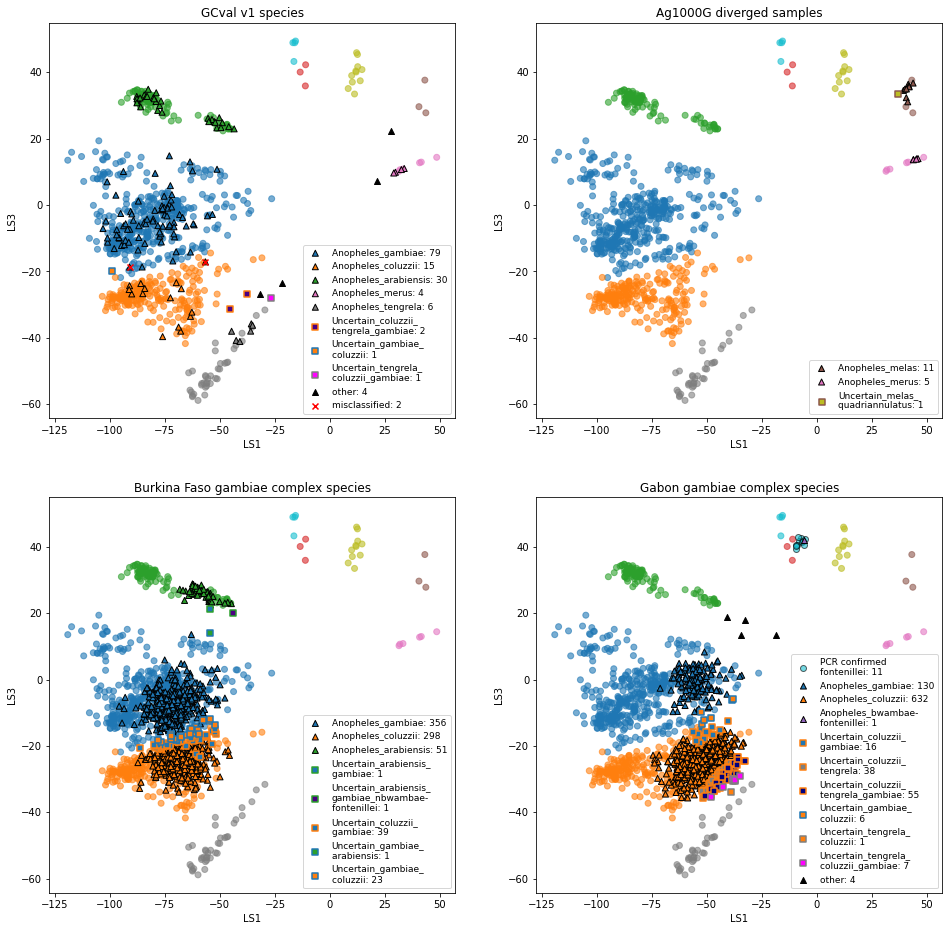

In [49]:
plot_vignette_figure(latenttrain, latentvalidation, latentag1k, latentburkina, latentgabon, './')

In [5]:
#country colour map
countries_coloured = ['Malawi', 'Tanzania', 'Gabon', 'Equatorial Guinea', 'Ghana',
                      'Burkina Faso', 'Cameroon', 'Central African Republic', 'Kenya', 'Uganda', 
                      'Gambia, The', 'Guinea-Bissau', 'Democratic Republic of Congo', 'Angola', 'Mali',
                      "unknown", "Cote d'Ivoire", 'Guinea', 'Mozambique', 'Mayotte']
colors = plt.cm.tab20(np.arange(20))

In [6]:
colorsm = np.append(colors, np.array([[0, 0, 0.50196078, 1], [0.82352941, 0.41176471, 0.11764706, 1], [0,191/255,1,1],[1,.9,0,1]]), axis=0)
countries_coloured.append("Madagascar")
countries_coloured.append("Nigeria")
countries_coloured.append("Zimbabwe")
countries_coloured.append("South Africa")

In [7]:
def plot_GCrefv1(latenttrain, saveloc, countries_ordered, colors, alpha=1):
    fig, ax = plt.subplots(2,2, figsize=(16,16))
    
    for lab, rc in zip(['Anopheles_gambiae', 'Anopheles_coluzzii', 'Anopheles_arabiensis',
      'Anopheles_melas',
       'Anopheles_merus', 'Anopheles_tengrela', 'Anopheles_bwambae',
       'Anopheles_quadriannulatus', 'Anopheles_fontenillei'], ['C0', 'C1', 'C2', 'C5', 'C6', 'C7', 'C3', 'C8', 'C9']):
        sub = latenttrain[latenttrain.species == lab]
        ax[0,0].scatter(sub['mean1'], sub['mean2'], c=np.repeat(rc, sub.shape[0]), alpha=1, label=lab)
        ax[0,1].scatter(sub['mean1'], sub['mean3'], c=np.repeat(rc, sub.shape[0]), alpha=1)
    for country, cc in zip(countries_ordered, colors):
        sub = latenttrain.loc[latenttrain.country == country]
        ax[1,1].scatter(sub['mean1'], sub['mean3'], c=np.tile(cc, sub.shape[0]).reshape(sub.shape[0], 4), alpha=alpha, 
                        label=country)

    ax[0,0].set_xlabel('LS1')
    ax[0,0].set_ylabel('LS2')
    ax[0,1].set_xlabel('LS1')
    ax[0,1].set_ylabel('LS3')
    ax[1,1].set_xlabel('LS1')
    ax[1,1].set_ylabel('LS3')
    ax[0,0].set_title('species reference dataset')
    ax[0,1].set_title('species reference dataset')
    ax[1,1].set_title('collection country')
    ax[1,0].axis('off')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    leg1 = ax[0,0].legend(loc='upper right', prop={'size': 8})
    leg2 = ax[1,1].legend(loc='lower right', ncol=1, prop={'size': 7})
    for lh, c in zip(leg2.legendHandles, colors):
        lh.set_color(c)
    plt.savefig(saveloc+'fig_4.png')
    #plt.savefig(saveloc+'species_ref.pdf')

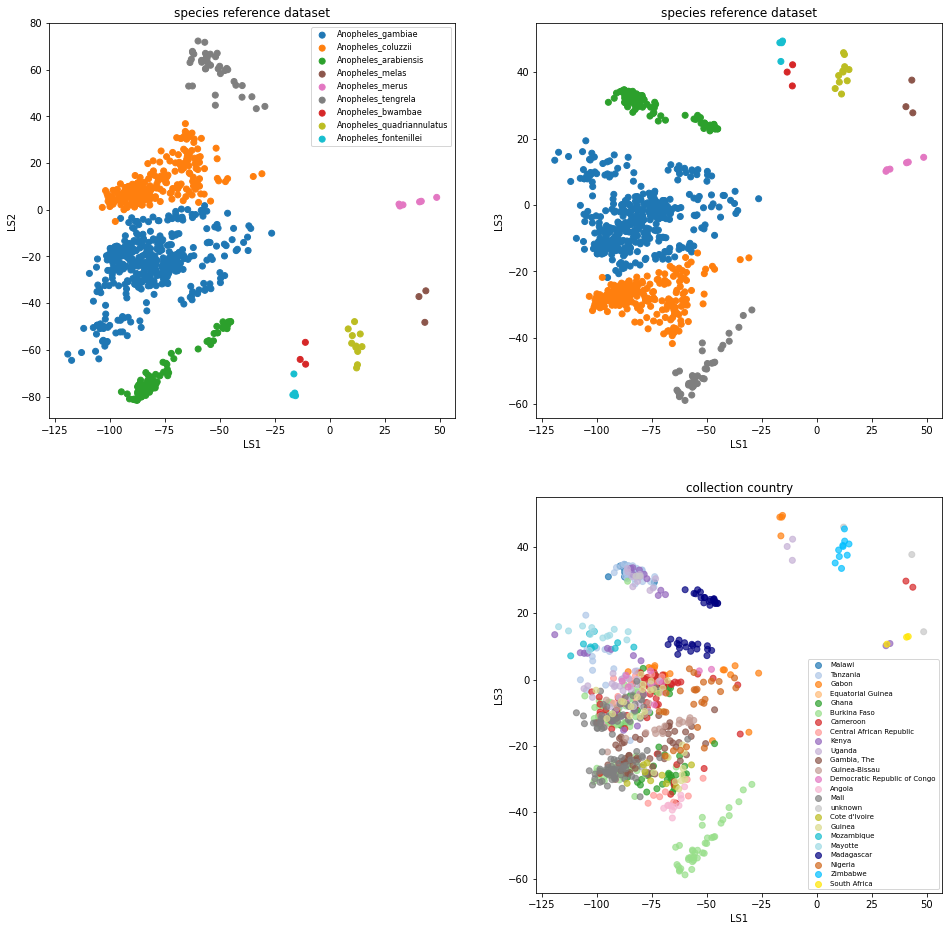

In [8]:
plot_GCrefv1(latenttrain, outtrain, countries_coloured, colorsm, .7)